# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, classification_report

# Load in the data

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train[0]

5

In [6]:
y_train.shape

(60000,)

# Exploratory Data Analysis

## Check for class imbalances

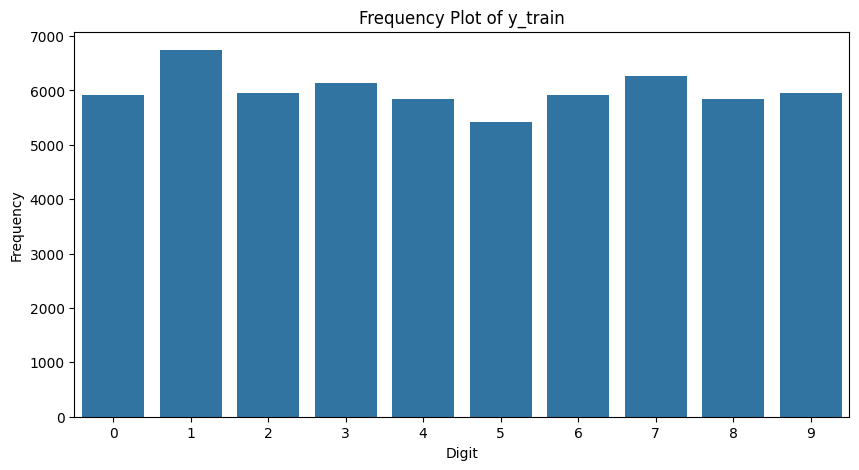

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train)
plt.title('Frequency Plot of y_train')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()


In [8]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


## Check for null values

In [9]:
np.isnan(x_train).any()

False

In [10]:
np.isnan(x_test).any()

False

## Standardize the target variable (0-1 )

In [6]:
# Normalize the images to the range [0,1]
train_images, test_images =  x_train / 255.0, x_test / 255.0

# Expand dimensions to match CNN input shape (batch_size, height, width, channels)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

## Check out the images

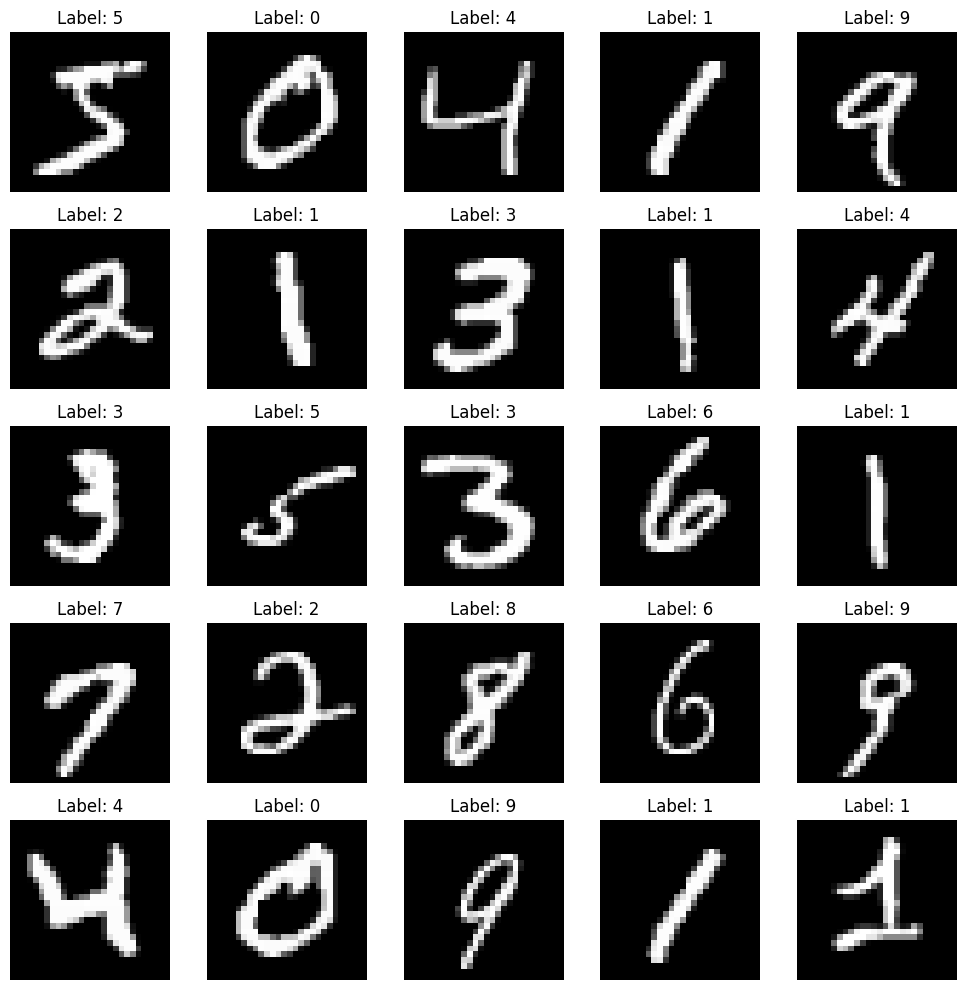

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < 25:  # Limit to the first 25 elements
        ax.imshow(x_train[i], cmap='gray')
        ax.set_title(f"Label: {y_train[i]}")  # Display the label
        ax.axis('off')
    else:
        ax.axis('off') # Hide unused subplots
plt.tight_layout()
plt.show()


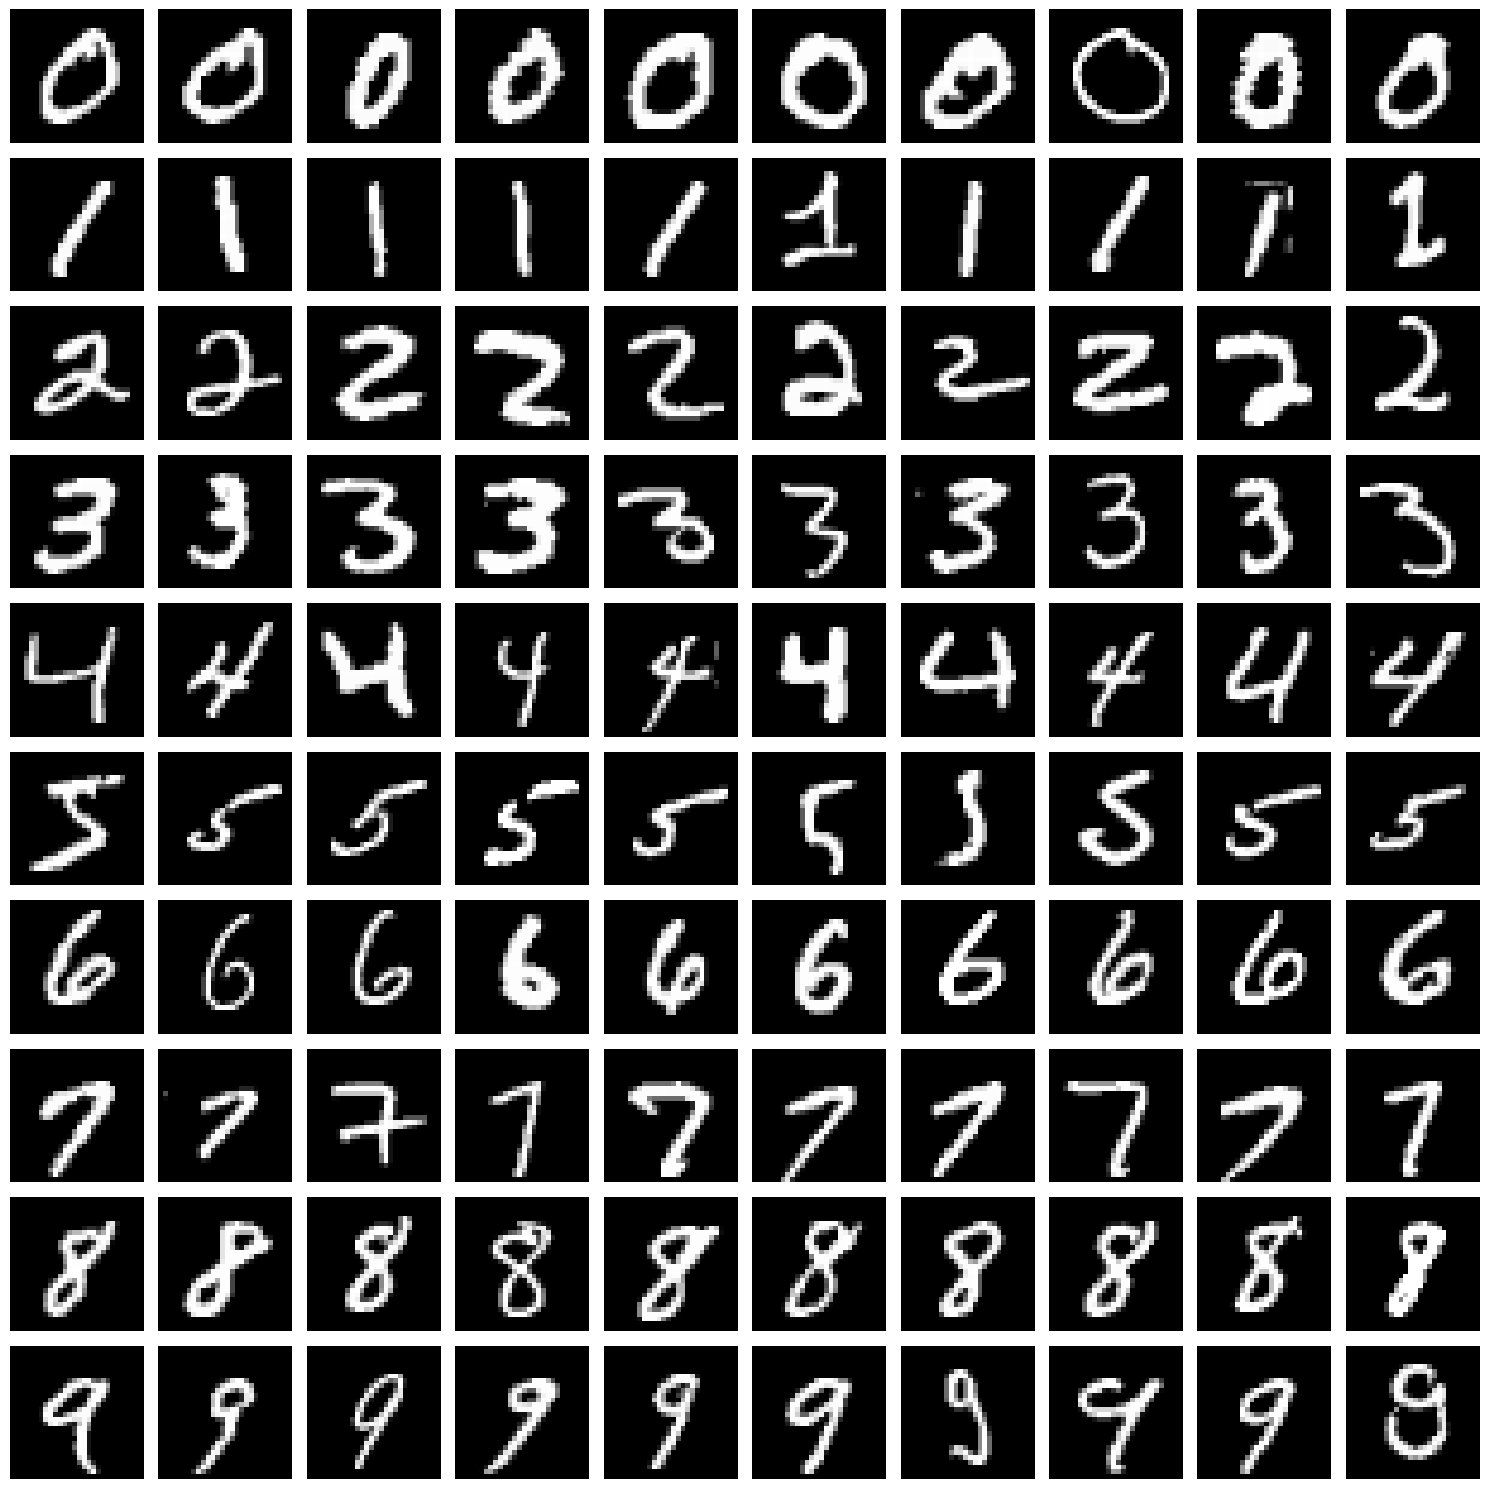

In [7]:
# Create a dictionary to store the first 10 images for each digit
digit_images = {}
for digit in range(10):
  digit_images[digit] = []

# Collect the first 10 images for each digit
for i in range(len(x_train)):
    digit = y_train[i]
    if len(digit_images[digit]) < 10:
        digit_images[digit].append(x_train[i])

# Create the plot
fig, axes = plt.subplots(10, 10, figsize=(15, 15))  # 10 rows for digits, 10 columns for images

for i, digit in enumerate(sorted(digit_images.keys())):  # Iterate through digits 0-9
    for j in range(10):  # Iterate through the first 10 images of that digit
        axes[i, j].imshow(digit_images[digit][j], cmap='gray')
        axes[i, j].axis('off')

    # Set the row label (digit)
    axes[i, 0].set_ylabel(str(digit), rotation=0, size='large', labelpad=20)

plt.tight_layout()
plt.show()


# CNN Model

The below function builds a CNN whose architecture can be varied easily

In [3]:
# Define a function to create a CNN model with varying architecture
def create_cnn(num_conv_layers, kernel_size, stride, pooling_type, pooling_size, use_batch_norm, use_dropout):
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=kernel_size, strides=stride, activation='relu', input_shape=(28, 28, 1)))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    if pooling_type == 'max':
        model.add(layers.MaxPooling2D(pool_size=pooling_size))
    else:
        model.add(layers.AveragePooling2D(pool_size=pooling_size))

    for _ in range(num_conv_layers - 1):
        model.add(layers.Conv2D(64, kernel_size=kernel_size, padding='same', strides=stride, activation='relu'))
        if use_batch_norm:
            model.add(layers.BatchNormalization())
        if pooling_type == 'max':
            model.add(layers.MaxPooling2D(pool_size=pooling_size))
        else:
            model.add(layers.AveragePooling2D(pool_size=pooling_size))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    if use_dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [4]:
# Define different configurations for experimentation
experiments = [
    {'num_conv_layers': 2, 'kernel_size': (3, 3), 'stride': (1, 1), 'pooling_type': 'max', 'pooling_size': (2, 2), 'use_batch_norm': False, 'use_dropout': False},
    {'num_conv_layers': 3, 'kernel_size': (3, 3), 'stride': (1, 1), 'pooling_type': 'max', 'pooling_size': (2, 2), 'use_batch_norm': True, 'use_dropout': False},
    {'num_conv_layers': 2, 'kernel_size': (5, 5), 'stride': (1, 1), 'pooling_type': 'avg', 'pooling_size': (2, 2), 'use_batch_norm': False, 'use_dropout': True},
    {'num_conv_layers': 3, 'kernel_size': (3, 3), 'stride': (1, 1), 'pooling_type': 'avg', 'pooling_size': (2, 2), 'use_batch_norm': True, 'use_dropout': True},
]

In [21]:
results = []
for i, config in enumerate(experiments):
    print(f"\nRunning Experiment {i+1} with config: {config}")
    model = create_cnn(**config)
    history = model.fit(train_images, y_train, epochs=5, validation_data=(test_images, y_test), verbose=1)

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(test_images, y_test, verbose=0)
    results.append({'Experiment': i+1, 'Test Accuracy': test_acc, 'Config': config})


Running Experiment 1 with config: {'num_conv_layers': 2, 'kernel_size': (3, 3), 'stride': (1, 1), 'pooling_type': 'max', 'pooling_size': (2, 2), 'use_batch_norm': False, 'use_dropout': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9170 - loss: 0.2665 - val_accuracy: 0.9852 - val_loss: 0.0440
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9874 - loss: 0.0400 - val_accuracy: 0.9857 - val_loss: 0.0411
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9911 - loss: 0.0269 - val_accuracy: 0.9902 - val_loss: 0.0279
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9891 - val_loss: 0.0352
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9910 - val_loss: 0.0317

Running Experiment 2 with config: {'num_conv_layers': 3, 'kernel_size': (3, 3), 'stride': (1, 1), 'pooling_type': 'max', 'pooling_size': (2, 2), 'use_batch_norm': True, 'use_dropout': False}
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9424 - loss: 0.1891 - val_accuracy: 0.9823 - val_loss: 0.0541
Epoch 2/5
1875/1875 ━━━━━━━━━━━

In [23]:
results_df = pd.DataFrame(results)
results_df

,Experiment,Test Accuracy,Config
0,1,0.9910,"{'num_conv_layers': 2, 'kernel_size': (3, 3), ..."
1,2,0.9875,"{'num_conv_layers': 3, 'kernel_size': (3, 3), ..."
2,3,0.9911,"{'num_conv_layers': 2, 'kernel_size': (5, 5), ..."
3,4,0.9929,"{'num_conv_layers': 3, 'kernel_size': (3, 3), ..."


In [7]:
config = experiments[3]
best_model = create_cnn(**config)
best_history = best_model.fit(train_images, y_train, epochs=5, validation_data=(test_images, y_test), verbose=1)

# Evaluate on test data
test_loss, test_acc = best_model.evaluate(test_images, y_test, verbose=0)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9108 - loss: 0.2844 - val_accuracy: 0.9852 - val_loss: 0.0446
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9830 - loss: 0.0602 - val_accuracy: 0.9846 - val_loss: 0.0480
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9871 - loss: 0.0429 - val_accuracy: 0.9912 - val_loss: 0.0288
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9899 - loss: 0.0362 - val_accuracy: 0.9920 - val_loss: 0.0289
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9910 - loss: 0.0298 - val_accuracy: 0.9931 - val_loss: 0.0252


In [11]:
best_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 13, 13, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 6, 6, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_8                  │ (None, 3, 3, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 393,952 (1.50 MB)

 Trainable params: 131,210 (512.54 KB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 262,422 (1.00 MB)

In [10]:
# Predictions and Evaluation Metrics
y_pred = np.argmax(best_model.predict(test_images), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



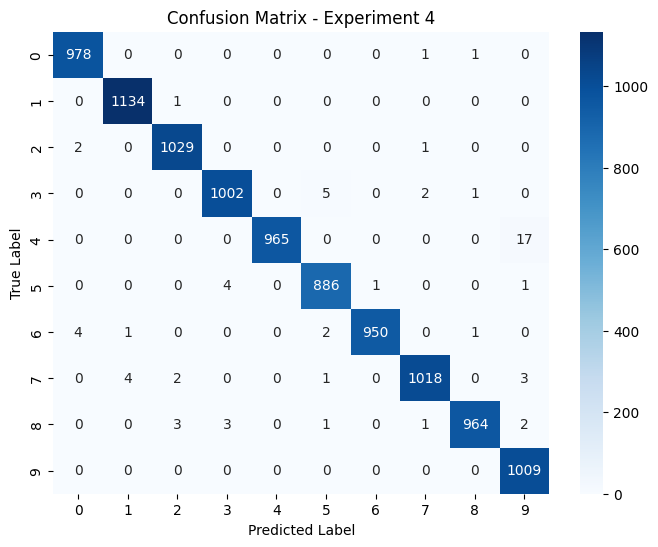

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Experiment 4')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


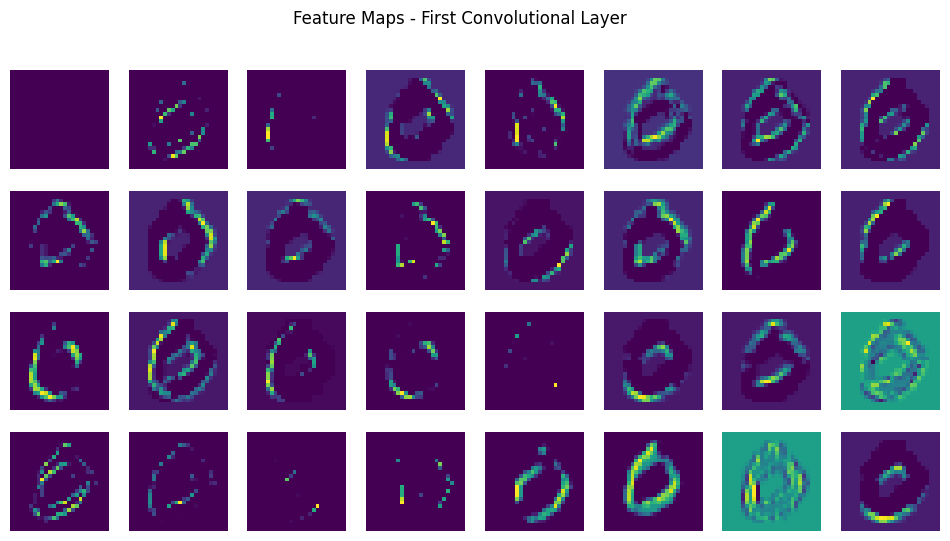

In [45]:
# Visualizing Feature Maps (First Layer)
conv_layers = [layer for layer in best_model.layers if isinstance(layer, layers.Conv2D)]
layer_outputs = [layer.output for layer in conv_layers]

# Use the input of the first convolutional layer instead of model.input
activation_model = models.Model(inputs=conv_layers[0].input, outputs=layer_outputs)

# Run the model on a sample input to extract activations
activations = activation_model.predict(test_images[3:4])

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
fig.suptitle('Feature Maps - First Convolutional Layer')
for i, ax in enumerate(axes.flat):
    if i < activations[0].shape[-1]:
        ax.imshow(activations[0][0, :, :, i], cmap='viridis')
        ax.axis('off')
plt.show()

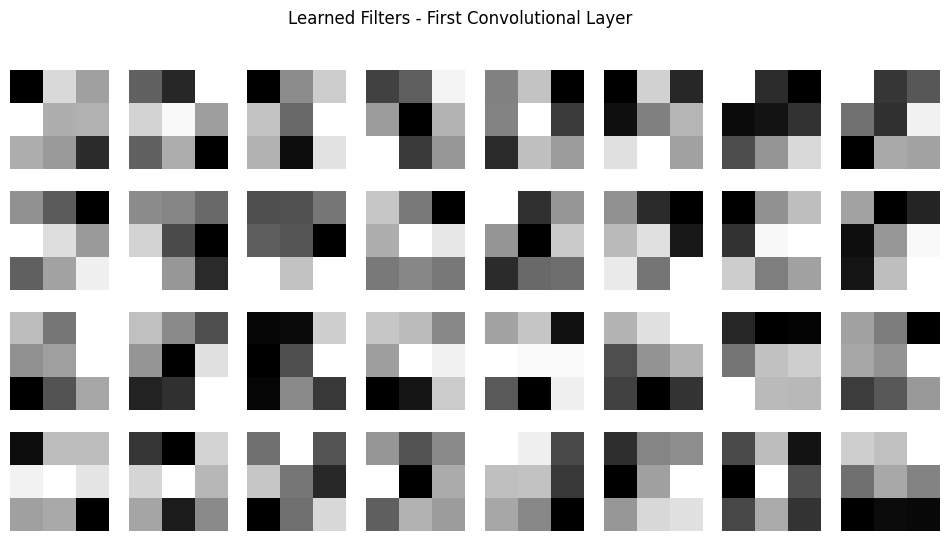

In [18]:
# Visualizing Filters -- first conv layer
filters, _ = best_model.layers[0].get_weights()
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
fig.suptitle('Learned Filters - First Convolutional Layer')
for i, ax in enumerate(axes.flat):
    if i < filters.shape[-1]:
        ax.imshow(filters[:, :, 0, i], cmap='gray')
        ax.axis('off')
plt.show()

In [11]:
misclassified_indices = [i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred != true]
len(misclassified_indices)

69

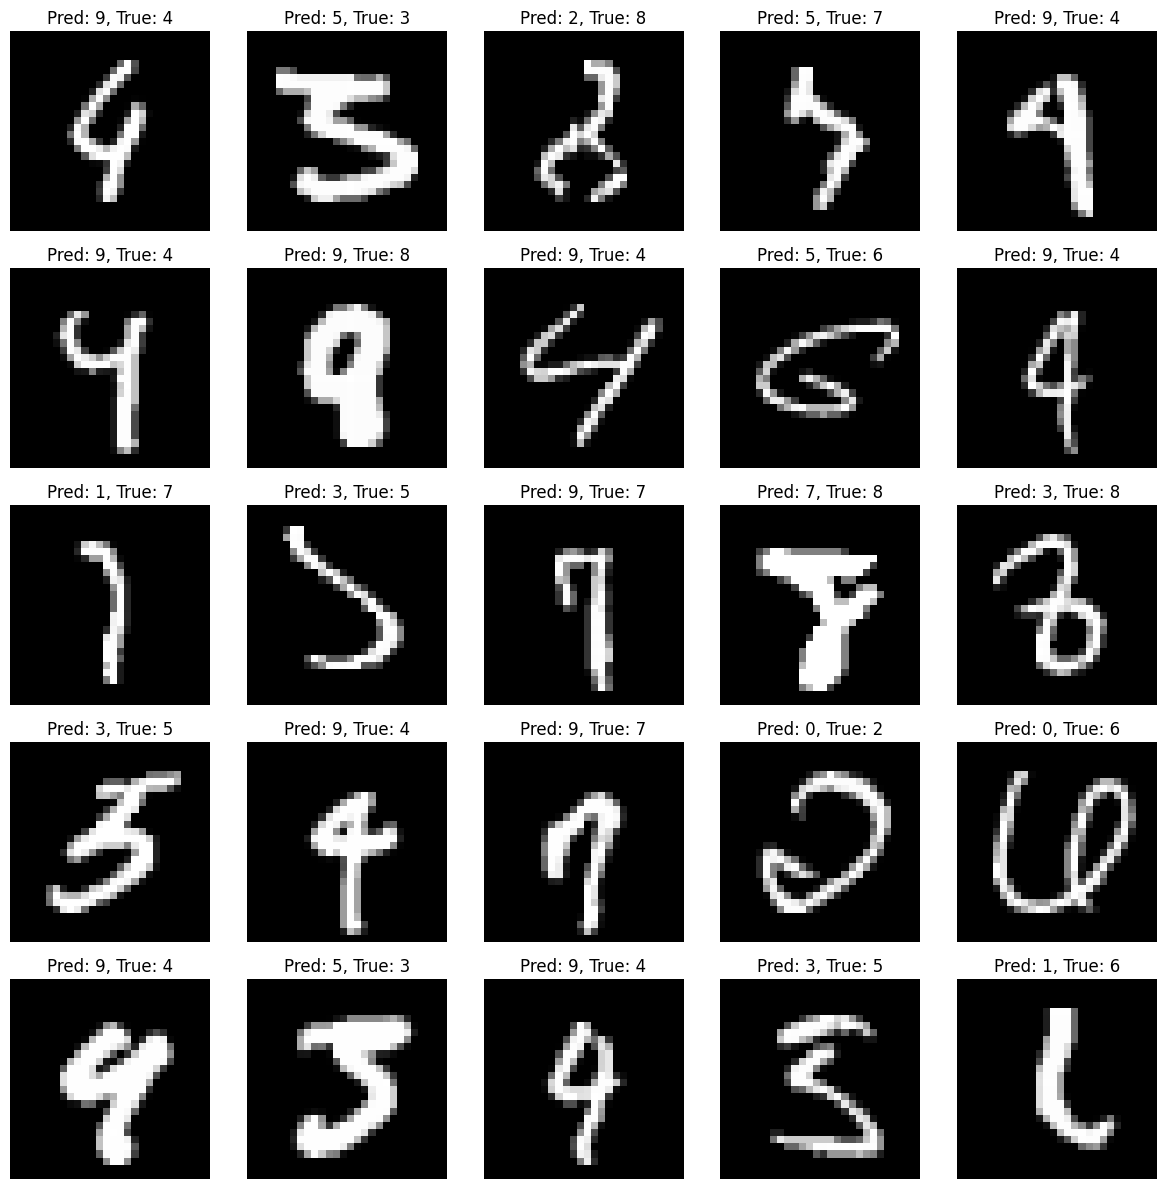

In [56]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    if i < 25 and i < len(misclassified_indices):
        index = misclassified_indices[i]
        ax.imshow(x_test[index].reshape(28, 28), cmap='gray')
        ax.set_title(f"Pred: {y_pred[index]}, True: {y_test[index]}")
        ax.axis('off')
    else:
        ax.axis('off')  # Hide unused subplots
plt.tight_layout()
plt.show()

In [13]:
# Get predicted probabilities for all test images
y_pred_probs = best_model.predict(test_images)

# Create an empty list to store the data for the DataFrame
misclassified_data = []

# Iterate through the misclassified indices
for i in misclassified_indices:
    # Get the true label
    true_label = y_test[i]
    # Get the predicted probabilities for this image
    probabilities = y_pred_probs[i]
    # Create a dictionary to store data for this image
    image_data = {'true_label': true_label}
    # Add the probabilities for each label to the dictionary
    for j in range(10):
        image_data[j] = probabilities[j]  # Probability for each label 0-9
    misclassified_data.append(image_data)

# Convert the data into a pandas DataFrame
misclassified_df = pd.DataFrame(misclassified_data)

# Set the index to be the misclassified indices
misclassified_df.index = misclassified_indices

# Display the DataFrame
misclassified_df


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,true_label,0,1,2,3,4,5,6,7,8,9
321,2,2.883142e-08,5.311556e-04,2.794423e-01,2.999049e-06,2.040162e-07,2.227750e-08,1.551791e-09,7.200198e-01,3.419891e-06,6.688666e-08
449,3,4.666285e-11,2.406038e-07,5.802495e-10,1.721960e-02,4.129969e-12,9.827797e-01,3.411523e-09,3.297250e-07,1.276891e-08,9.746257e-09
583,2,1.110129e-12,1.215754e-06,4.728187e-03,3.057914e-06,4.126641e-07,1.591833e-09,2.099722e-12,9.952670e-01,1.710906e-07,3.568199e-09
659,2,7.524539e-06,4.944477e-01,2.096784e-01,4.748101e-05,8.156843e-04,1.953988e-06,4.617659e-07,2.948488e-01,1.197363e-04,3.224162e-05
924,2,1.833975e-13,1.094152e-06,3.140227e-04,2.388094e-09,6.829110e-10,4.808348e-12,2.646672e-14,9.996849e-01,2.520477e-10,3.518521e-12
...,...,...,...,...,...,...,...,...,...,...,...
9642,9,1.138457e-05,1.224329e-04,2.666533e-04,8.008711e-03,3.238212e-05,1.641405e-04,6.070028e-08,9.387626e-01,3.557304e-04,5.227587e-02
9664,2,5.034068e-08,2.483576e-05,2.166586e-02,1.041534e-02,5.356522e-07,6.838387e-07,3.319860e-08,9.678057e-01,8.568617e-05,1.316419e-06
9692,9,2.533518e-05,3.815787e-02,7.277631e-04,3.573173e-03,1.071245e-01,4.056203e-04,6.449422e-05,7.768620e-01,3.678880e-03,6.938037e-02
9729,5,4.281553e-04,1.145284e-09,4.979614e-09,1.391912e-07,1.106318e-07,1.657926e-04,9.994001e-01,1.685409e-10,5.601014e-06,2.887891e-08


In [16]:
# Isolate rows where the true_label is 4
misclassified_4 = misclassified_df[misclassified_df['true_label'] == 4]

# Display the isolated DataFrame
misclassified_4


,true_label,0,1,2,3,4,5,6,7,8,9
1112,4,1.128345e-04,1.060991e-05,6.887918e-07,6.073638e-10,0.098682,9.013515e-07,9.011737e-01,5.586382e-10,1.710557e-05,2.325138e-06
2130,4,9.768370e-09,2.459193e-07,2.395858e-08,1.317819e-08,0.131867,1.473410e-06,2.255806e-08,2.570404e-05,5.994887e-06,8.680998e-01
3780,4,1.582703e-08,4.487422e-06,7.732343e-07,2.408123e-13,0.167214,1.066807e-07,8.327801e-01,8.073657e-13,7.411409e-08,1.436588e-09
